## Crowd-sourced data
#### This notebook shows the code to plot the crowd-sourced data for the extreme hail event on 28 June 2021

In [1]:
#load packages
%load_ext autoreload
%autoreload 2
import numpy as np #1.20.3 is default
import pandas as pd 
import xarray as xr
import sys
import matplotlib.pyplot as plt
from climada import CONFIG
sys.path.append(str(CONFIG.local_data.func_dir))
import scClim.hail_climada as fct
import scClim as sc
from scClim.constants import CH_EXTENT_EPSG2056,ZRH_EXTENT_EPSG2056,ID_COL_DICT,SUB_CH_EXTENT_2056, INT_RANGE_DICT

data_dir = str(CONFIG.local_data.data_dir)
out_dir = str(CONFIG.local_data.out_dir)

Could not find bayes_opt. Module Calib_opt will not work.


In [ ]:
#load dataset
ds_KGV = xr.open_dataset(data_dir+'/KGV/ds_building_dmg_v7_1000m_wModImp.nc')
ds_KGV = ds_KGV.rename({'value':'imp_observed'})
ds_KGV['PAA_MESHS'] = ds_KGV.n_buildings_MESHS/ds_KGV.n_count_exposure
ds_KGV['PAA_crowd'] = ds_KGV.n_buildings_crowd/ds_KGV.n_count_exposure

In [ ]:
from scipy.ndimage import gaussian_filter
ds_KGV['interpPAA'] = (("chy","chx"),sc.both.interp2d_na(ds_KGV.sel(date='2021-06-28').PAA.values))
ds_KGV['smooth_PAA'] = (("chy","chx"),gaussian_filter(ds_KGV['interpPAA'] ,sigma=1))

C:\Users/timo_/Documents/PhD/CLIMADA/scClim\scClim\crowd_process.py:66: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crowd_data['months'] = crowd_data['Time'].dt.to_period('M')
C:\Users/timo_/Documents/PhD/CLIMADA/scClim\scClim\crowd_process.py:67: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crowd_data['years'] = crowd_data['Time'].dt.to_period('Y')


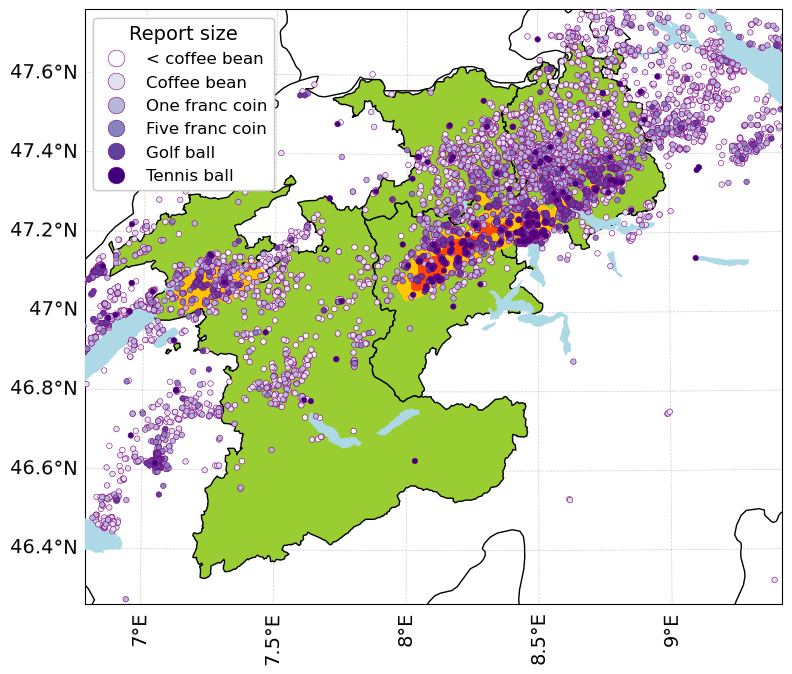

In [13]:
levels = [0.1,0.5,1]
fig,ax = sc.crowd_process.plot_crowd_date('2021-06-28',processed=True,dpi=100,relief=False,figsize=(9,9))
sc.plot_nc(ds_KGV['smooth_PAA'],pl_type='contourf',levels=levels,crs = 'EPSG:2056',ax=ax,zorder=3.5,cmap='autumn_r',extent =SUB_CH_EXTENT_2056)
sc.plot_canton(ax=ax,canton=['Zürich','Bern','Luzern','Aargau'],facecolor='yellowgreen',lakes=True,zorder=3)
fig.savefig(out_dir+'/paper1/figB1.png',dpi=300,bbox_inches='tight')